In [2]:
# MNIST classification using regularisation.
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



Using TensorFlow backend.


In [0]:
from PIL import Image

In [4]:
x_train.shape


(60000, 28, 28)

In [0]:
from matplotlib import pyplot
import numpy as np

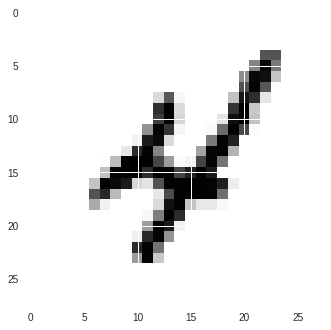

In [7]:
#pyplot.imshow(x_train[0])

In [0]:
x_train_tmp = []
x_test_tmp = []
# Reshape images from 28x28 to 32x32
for i in range(len(x_train)):
	img = Image.fromarray(x_train[i])
	new_image = img.resize((32,32), Image.HAMMING)
	img_array = new_image.convert('L') #converts image to monochrome
	img_array = np.array(img_array)
	x_train_tmp.append(img_array)

for i in range(len(x_test)):
	img = Image.fromarray(x_test[i])
	new_image = img.resize((32,32), Image.HAMMING)
	img_array = new_image.convert('L')
	img_array = np.array(img_array)
	x_test_tmp.append(img_array)

x_train = np.array(x_train_tmp)
x_test = np.array(x_test_tmp)

In [0]:
#x_train.shape

In [0]:
#pyplot.imshow(x_train[1])

In [0]:
#x_train[1].shape

In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
input_shape = (32, 32, 1)


In [0]:
#x_train.shape

In [0]:
# Normalising data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
# Importing required keras libraries 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten # To Add the fully connected layers to ANN
from keras.layers import Conv2D, MaxPooling2D # Convolutional step and Max pooling step
from keras.utils import np_utils
from keras.optimizers import SGD, Adagrad, Adam
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import regularizers


In [0]:
model = Sequential()
# input shape: 32x32 images with 1 channel 
# Applying 64 convolution filters of size 3x3 each.
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))

In [0]:
# Maxpool of size 2x2
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))

In [0]:
# 2nd convolutional layer with 128 convolutions
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# Maxpool of size 2x2 and stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


In [0]:
#for i in range(len(model.layers)):
  #print( model.layers[i].output )

In [0]:
# 3rd and 4th convolutional layer with 256 convolutions each 
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

In [0]:
# Maxpool of size 2x2 and stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))

In [0]:
# 5th and 6th convolutional layer with 512 convolutions 
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

In [0]:
# Maxpool of size 2x2 and stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))

In [0]:
# 7th and 8th convolutional layer with 512 convolutions 
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

In [0]:
# Maxpool of size 2x2 and stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 

In [0]:
# Flattening the model
model.add(Flatten())

In [0]:
# Full connected Network of 3 layers 
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(1e-3)) )
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(1e-3)) )
model.add(Dense(512, activation='relu'))

In [0]:
# Last layer
model.add(Dense(10, activation='softmax'))

In [0]:
#for i in range(len(model.layers)):
 # print( model.layers[i].output )

In [144]:
print( model.summary() )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 256)         0         
__________

In [0]:
# Compiling model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#y_train.shape

In [0]:
y_train = y_train.reshape(y_train.shape[0],1)
#y_train.shape

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)

In [0]:
y_test = y_test.reshape(y_test.shape[0],1)
#print( y_test.shape )
y_test = to_categorical(y_test, 10)
#print( y_test.shape )

In [150]:
train_model = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test,y_test), epochs=7, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 123s 2ms/step - loss: 4.2121 - acc: 0.7564 - val_loss: 2.4350 - val_acc: 0.9837
Epoch 2/7
60000/60000 [==============================] - 121s 2ms/step - loss: 1.7399 - acc: 0.9819 - val_loss: 1.1609 - val_acc: 0.9903
Epoch 3/7
60000/60000 [==============================] - 121s 2ms/step - loss: 0.8371 - acc: 0.9892 - val_loss: 0.5784 - val_acc: 0.9877
Epoch 4/7
60000/60000 [==============================] - 121s 2ms/step - loss: 0.4123 - acc: 0.9910 - val_loss: 0.2905 - val_acc: 0.9911
Epoch 5/7
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2079 - acc: 0.9936 - val_loss: 0.1572 - val_acc: 0.9915
Epoch 6/7
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1103 - acc: 0.9944 - val_loss: 0.0985 - val_acc: 0.9897
Epoch 7/7
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0617 - acc: 0.9956 - val_loss: 0.0579 - val_acc

In [0]:
model.save('model')


In [152]:
score = model.evaluate(x_test, y_test, batch_size=32)

10000/10000 [==============================] - 4s 449us/step


In [153]:
print(score)

[0.057854020369052885, 0.9927]


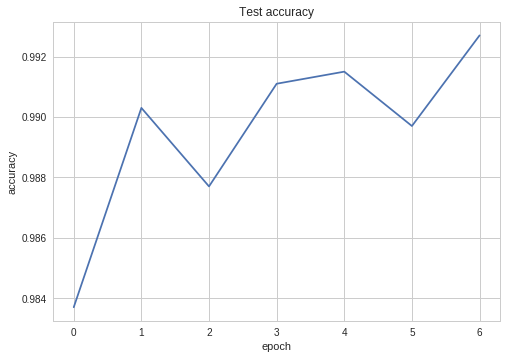

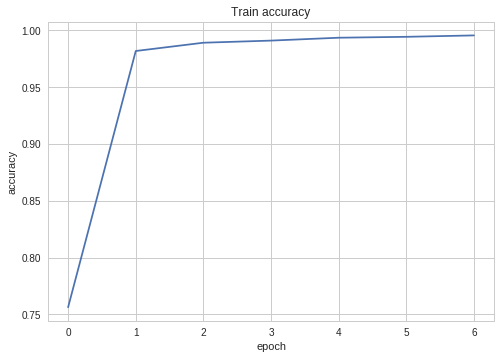

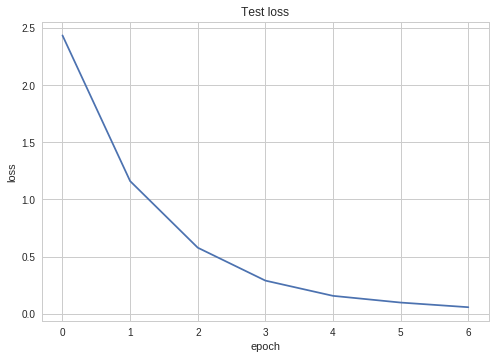

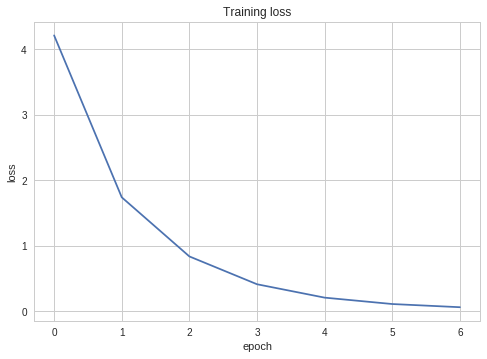

In [154]:
import matplotlib.pyplot as plt

# Test accuracy vs no. of epochs
plt.plot(train_model.history['val_acc'])
plt.title('Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Training accuracy vs no. of epochs
plt.plot(train_model.history['acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Test Loss vs no. of epochs
plt.plot(train_model.history['val_loss'])
plt.title('Test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Training Loss vs no. of epochs
plt.plot(train_model.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [0]:
#x_test.shape

In [0]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])

In [0]:
#x_test.shape

In [158]:
accs = []
rotations = []
for rotation in range(-45,46,5):
  x_test_tmp = []
  
  for i in range(len(x_test)):
    img = Image.fromarray(x_test[i])
    new_image = img.rotate(rotation)
    img_array = np.array(new_image)
    x_test_tmp.append(img_array)
    
  x_test_tmp = np.array(x_test_tmp)
  x_test_tmp = x_test_tmp.reshape(x_test_tmp.shape[0], 32, 32, 1)
  score = model.evaluate(x_test_tmp, y_test, batch_size=32)
  accs.append(score[1])
  rotations.append(rotation)
  #print("Rotation", rotation, "Score", score)

10000/10000 [==============================] - 4s 450us/step


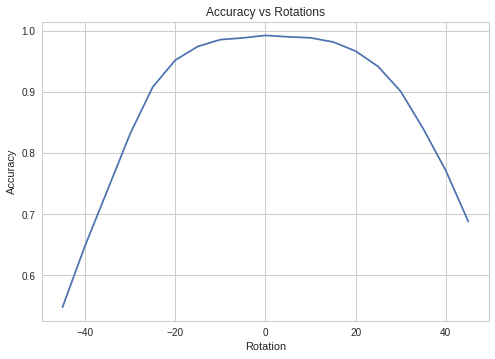

In [159]:
plt.figure()
plt.plot(rotations,accs)
plt.xlabel('Rotation')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Rotations')
plt.style.use('seaborn-whitegrid')
plt.show()


In [160]:
from PIL import ImageFilter
from scipy.ndimage.filters import gaussian_filter

accs = []
blurs_radius = []
for blur in range(0,7):
  x_test_tmp = []
  
  for i in range(len(x_test)):
    blurred_img_array = gaussian_filter(x_test[i], sigma=blur)
    #pyplot.imshow(blurred_image_array)
    #pdb.set_trace()
    x_test_tmp.append(blurred_img_array)
    
  x_test_tmp = np.array(x_test_tmp)
  x_test_tmp = x_test_tmp.reshape(x_test_tmp.shape[0], 32, 32, 1)
  score = model.evaluate(x_test_tmp, y_test, batch_size=32)
  accs.append(score[1])
  blurs_radius.append(blur)
  #print("Blur", blur, "Score", score)


10000/10000 [==============================] - 5s 460us/step


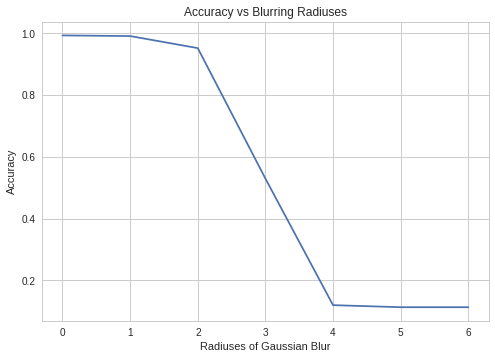

In [161]:
plt.figure()
plt.plot(blurs_radius, accs)
plt.xlabel('Radiuses of Gaussian Blur')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Blurring Radiuses')
plt.style.use('seaborn-whitegrid')
plt.show()
